In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.utils import shuffle
from algs_lib import *
from math import comb

In [3]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})


rc('font',**{'family':'serif','serif':['Times']})
# plt.rcParams["font.family"] = "Helvetica"

rc('text', usetex=True)

In [4]:
fname = '../hybrid_baseline/{}_baselines.pkl'

for data in ['iris', 'rice', 'bean', 'cifar10']:
    print(data, pickle.load(open(fname.format(data), 'rb')))
    print('\n\n')


iris {'kmeans': {True: 0.9167142857142981, False: 0.9180000000000123}, 'svm': {1.0: 0.9591836734693955, 0.05: 0.7142857142857043}, 'dt': {(None, 0, 1.0): 0.9183673469387877, (0.01, 0.2, 0.8): 0.9387755102040937}, 'pca': {1: 0.2060303453624783, 2: 0.10858815750013762}}



rice {'kmeans': {True: 0.916286339754825, False: 0.9180726795096399}, 'svm': {1.0: 0.9316987740805793, 0.05: 0.9308231173380125}, 'dt': {(None, 0, 1.0): 0.9325744308231315, (0.01, 0.35, 0.51): 0.8791593695271682}, 'pca': {1: 0.1849155953315176, 6: 0.0022962300805914066}}



bean {'kmeans': {True: 0.8555868234141543, False: 0.6979877541023779}, 'svm': {1.0: 0.9130541268674809, 0.005: 0.8253734998775232}, 'pca': {1: 0.16837339048944142, 8: 0.007807878351306268}}



cifar10 {'pca': {1: 0.389900738044782, 3: 0.33665230833154924}}





[0.9157959183673469, 0.9157959183673469, 0.9157959183673469, 0.9157959183673469, 0.9157959183673469, 0.9157959183673469, 0.9157959183673469, 0.9157959183673469, 0.9157959183673469]
[0.9137758318739055, 0.9137758318739055, 0.9137758318739055, 0.9137758318739055, 0.9137758318739055, 0.9137758318739055, 0.9137758318739055, 0.9137758318739055, 0.9137758318739055]
[0.7522799412196914, 0.7522799412196914, 0.7522799412196914, 0.7522799412196914, 0.7522799412196914, 0.7522799412196914, 0.7522799412196914, 0.7522799412196914, 0.7522799412196914]


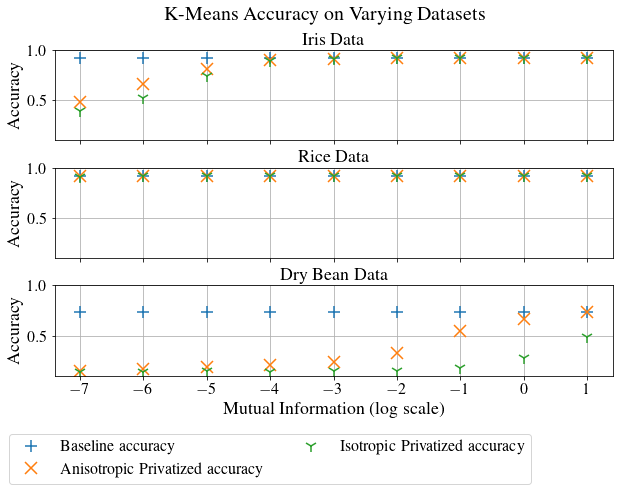

In [5]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
hybrid_fnames = ["data/iris_kmeans_acc_bal=False.pkl",
          "data/rice_kmeans_acc_bal=False.pkl",
          "data/bean_kmeans_acc_bal=False.pkl"]
iso_fnames = ["data/iris_iso_kmeans_acc_bal=False.pkl",
             "data/rice_iso_kmeans_acc_bal=False.pkl",
             "data/bean_iso_kmeans_acc_bal=False.pkl"]

baseline_vals = [0.9180000000000123, 0.9180726795096399, 0.7314043595395553]
data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))



for ind, data in enumerate(data_types):
    hybrid_acc_dict = pickle.load(open(hybrid_fnames[ind], 'rb'))
    iso_acc_dict = pickle.load(open(iso_fnames[ind], 'rb'))
    ax = axes[ind]
    sorted_keys = true_x_vals
    subsampling_ys = [max(hybrid_acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print(subsampling_ys)
    hybrid_priv_ys = [hybrid_acc_dict[k][2] for k in sorted_keys]
#     print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][2] for k in sorted_keys]
#     print(subsampling_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
#     ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    
    y_min, y_max = 0.1, 1.0
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("K-Means Accuracy on Varying Datasets", fontsize=20)

plt.savefig('hybrid_figs/mi_kmeans_naive.svg', bbox_inches = "tight")


[0.9168775510204082, 0.9168775510204082, 0.9168775510204082, 0.9168775510204082, 0.9168775510204082, 0.9168775510204082, 0.9168775510204082, 0.9168775510204082, 0.9168775510204082]
[0.48593877551020404, 0.6730204081632652, 0.8258979591836735, 0.9000408163265307, 0.9138571428571429, 0.9162244897959183, 0.9169795918367347, 0.916795918367347, 0.9162244897959183]
[0.9120131348511383, 0.9120131348511383, 0.9120131348511383, 0.9120131348511383, 0.9120131348511383, 0.9120131348511383, 0.9120131348511383, 0.9120131348511383, 0.9120131348511383]
[0.9115499124343257, 0.9120035026269702, 0.911889667250438, 0.9119544658493871, 0.9119518388791593, 0.9119772329246937, 0.912014010507881, 0.9119640980735553, 0.9118800350262698]
[0.8608398236590742, 0.8608398236590742, 0.8608398236590742, 0.8608398236590742, 0.8608398236590742, 0.8608398236590742, 0.8608398236590742, 0.8608398236590742, 0.8608398236590742]
[0.1822978202302229, 0.23579794268919912, 0.2855515552289982, 0.36596252755326963, 0.521462405094

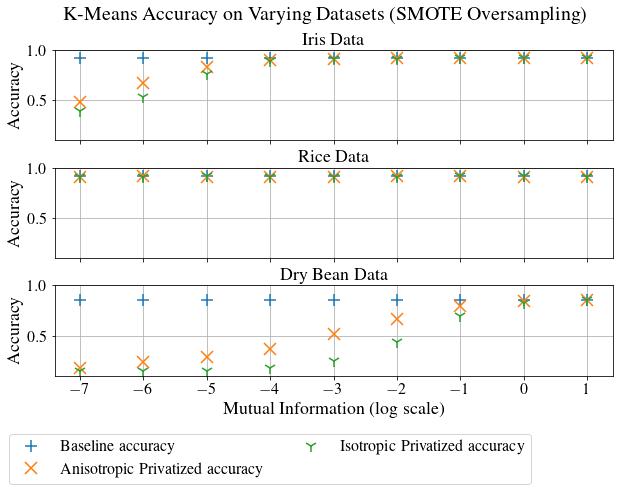

In [41]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
hybrid_fnames = ["data/iris_kmeans_acc_bal=True.pkl",
          "data/rice_kmeans_acc_bal=True.pkl",
          "data/bean_kmeans_acc_bal=True.pkl"]
iso_fnames = ["data/iris_iso_kmeans_acc_bal=True.pkl",
             "data/rice_iso_kmeans_acc_bal=True.pkl",
             "data/bean_iso_kmeans_acc_bal=True.pkl"]

baseline_vals = [0.916714285714298, 0.916286339754825, 0.8555868234141543]
data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))



for ind, data in enumerate(data_types):
    hybrid_acc_dict = pickle.load(open(hybrid_fnames[ind], 'rb'))
    iso_acc_dict = pickle.load(open(iso_fnames[ind], 'rb'))
    ax = axes[ind]
    sorted_keys = true_x_vals
    subsampling_ys = [max(hybrid_acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print(subsampling_ys)
    hybrid_priv_ys = [hybrid_acc_dict[k][2] for k in sorted_keys]
    print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][2] for k in sorted_keys]
#     print(subsampling_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
#     ax.plot(transformed_x_vals, subsampling_ys, '+', markersize=12, mew=1.5, label="Subsampled accuracy")
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    
    y_min, y_max = 0.1, 1.0
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("K-Means Accuracy on Varying Datasets (SMOTE Oversampling)", fontsize=20)
plt.savefig('hybrid_figs/mi_kmeans_balanced.png', bbox_inches = "tight")


# SVM

[0.34793877551020225, 0.3524489795918348, 0.38267346938775243, 0.40732653061224294, 0.4727142857142851, 0.5884693877551019, 0.7127755102040826, 0.8156326530612283, 0.8780000000000079]
[0.5240542907180379, 0.5432101576182123, 0.598657618213658, 0.6676786339754792, 0.7841970227670744, 0.8743642732049032, 0.9104465849387018, 0.921298598949209, 0.9245481611208325]
[0.15998554984080376, 0.1565373499877549, 0.1596372765123691, 0.15985941709527393, 0.1670822924320359, 0.1777893705608629, 0.2006615233896654, 0.25529977957384375, 0.36015968650502106]


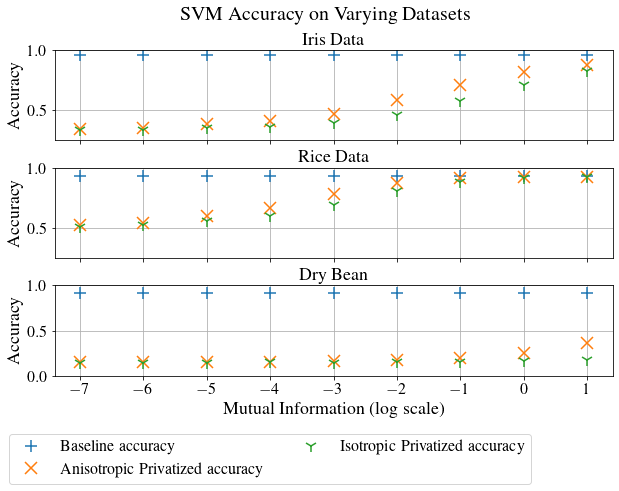

In [42]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
# fnames = ["hybrid_data/iris_acc_mi={}.pkl",
#           "hybrid_data/rice_acc_mi={}.pkl",
#          "hybrid_data/bean_acc_mi={}.pkl"]

# iso_fnames = ["hybrid_data/iris_iso_acc_mi={}.pkl",
#           "hybrid_data/rice_iso_acc_mi={}.pkl",
#              "hybrid_data/bean_iso_acc_mi={}.pkl"]

fnames = ["data/iris_acc_mi={}.pkl",
          "data/rice_acc_mi={}.pkl",
         "data/bean_acc_mi={}.pkl"]

iso_fnames = ["data/iris_iso_acc_mi={}.pkl",
          "data/rice_iso_acc_mi={}.pkl",
             "data/bean_iso_acc_mi={}.pkl"]

data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.9591836734693955, 0.9316987740805793, 0.9130541268674809]




# reg = 0.05
C_vals = [1.0, 1.0, 1.0]
ys = [(0.25, 1.), (0.25, 1.), (0, 1)]

for ind, data in enumerate(data_types):

    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[C_vals[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[C_vals[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = true_x_vals
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0.25, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("SVM Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/mi_svm_naive.png', bbox_inches = "tight")


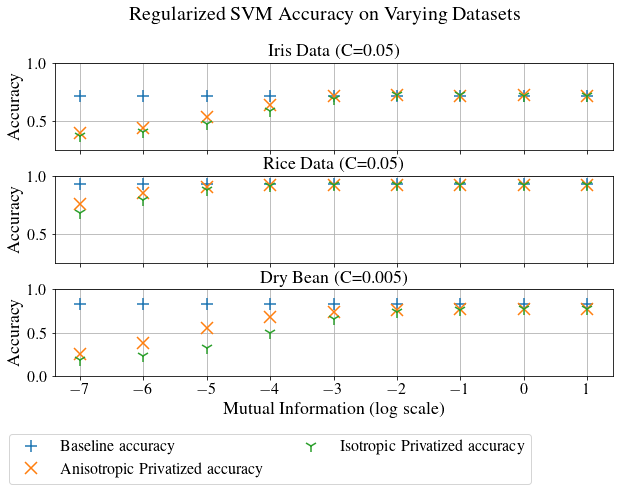

In [43]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
fnames = ["data/iris_acc_mi={}.pkl",
          "data/rice_acc_mi={}.pkl",
         "data/bean_acc_mi={}.pkl"]

iso_fnames = ["data/iris_iso_acc_mi={}.pkl",
          "data/rice_iso_acc_mi={}.pkl",
             "data/bean_iso_acc_mi={}.pkl"]

data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data (C=0.05)", "Rice Data (C=0.05)", "Dry Bean (C=0.005)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.7142857142857043, 0.9308231173380125, 0.8253734998775232]
# reg = 0.05
C_vals = [0.05, 0.05, 0.005]
ys = [(0.25, 1.), (0.25, 1.), (0, 1)]
# 

for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[C_vals[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[C_vals[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
#     print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0.25, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Regularized SVM Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/mi_svm_reg.png', bbox_inches = "tight")


# DT

nonprivate [0.9033265306122579, 0.9033265306122579, 0.9033265306122579, 0.9033265306122579, 0.9033265306122579, 0.9033265306122579, 0.9033265306122579, 0.9033265306122579, 0.9033265306122579]
aniso [0.34416326530611907, 0.3472244897959152, 0.36673469387754815, 0.40448979591836515, 0.48520408163265144, 0.5962448979591839, 0.7319387755102056, 0.81385714285715, 0.8709795918367468]
nonprivate [0.9246103327495568, 0.9246103327495568, 0.9246103327495568, 0.9246103327495568, 0.9246103327495568, 0.9246103327495568, 0.9246103327495568, 0.9246103327495568, 0.9246103327495568]
aniso [0.5439553415061301, 0.5781217162872158, 0.6507942206654997, 0.757094570928196, 0.8539912434325735, 0.8969264448336257, 0.918197022767073, 0.9234325744308196, 0.9213817863397489]


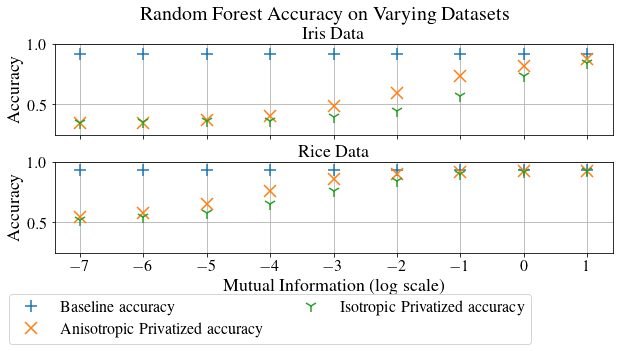

In [9]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
regs = [(None, 0.0, 1.0), (None, 0, 1.0)]
fnames = ["data/iris_acc_auto_reg={}_mi={}.pkl",
          "data/rice_acc_auto_reg={}_mi={}.pkl"]
# iris_iso_acc_auto_reg=(0.01, 0.1, 0.95)_mi=0.015625.pkl	
iso_fnames = ["data/iris_iso_acc_auto_reg={}_mi={}.pkl",
          "data/rice_iso_acc_auto_reg={}_mi={}.pkl"]

data_types = ['iris', 'rice']
titles = ["Iris Data", "Rice Data"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 4))

baseline_vals = [0.9183673469387877, 0.9325744308231315]


for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('nonprivate', subsampling_ys)
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Random Forest Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/dt_naive.png', bbox_inches = "tight")
# hybrid_dt/iris_acc_auto_reg=(None, 0.0, 1.0)_mi=0.015625.pkl

data/iris_iso_acc_auto_reg=(0.01, 0.2, 0.8)_mi=2.0.pkl
nonprivate [0.9211836734694006, 0.9211836734694006, 0.9211836734694006, 0.9211836734694006, 0.9211836734694006, 0.9211836734694006, 0.9211836734694006, 0.9211836734694006, 0.9211836734694006]
aniso [0.486244897959181, 0.49748979591836534, 0.5393673469387749, 0.5863061224489801, 0.663734693877552, 0.7474489795918385, 0.828795918367353, 0.8819387755102153, 0.9121428571428696]
data/rice_iso_acc_auto_reg=(0.01, 0.35, 0.51)_mi=2.0.pkl
nonprivate [0.8833949211909063, 0.8833949211909063, 0.8833949211909063, 0.8833949211909063, 0.8833949211909063, 0.8833949211909063, 0.8833949211909063, 0.8833949211909063, 0.8833949211909063]
aniso [0.8832215411558799, 0.883222416812622, 0.8831619964973852, 0.8832285464098206, 0.8833152364273321, 0.8832854640980861, 0.8833949211909063, 0.8833143607705906, 0.8833239929947589]


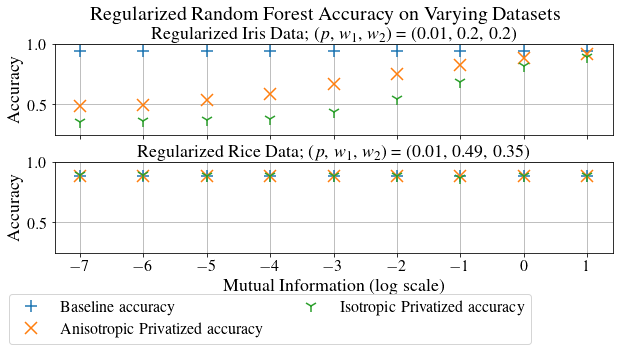

In [10]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
regs = [(0.01, 0.2, 0.8), (0.01, 0.35, 0.51)]
fnames = ["data/iris_acc_auto_reg={}_mi={}.pkl",
          "data/rice_acc_auto_reg={}_mi={}.pkl"]

iso_fnames = ["data/iris_iso_acc_auto_reg={}_mi={}.pkl",
          "data/rice_iso_acc_auto_reg={}_mi={}.pkl"]
# iris_iso_acc_auto_reg=(0.01, 0.2, 0.8)_mi=0.015625.pkl

data_types = ['iris', 'rice']
# p, w2, 1-w1
titles = ["Regularized Iris Data; ($p$, $w_1$, $w_2$) = (0.01, 0.2, 0.2)", "Regularized Rice Data; ($p$, $w_1$, $w_2$) = (0.01, 0.49, 0.35)"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 4))

baseline_vals = [0.9387755102040937, 0.8791593695271682]

for ind, data in enumerate(data_types):

    print(iso_fnames[ind].format(regs[ind], mi))
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print('nonprivate', subsampling_ys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Regularized Random Forest Accuracy on Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/dt_reg.png', bbox_inches = "tight")


# PCA

[0.18457246181558162, 0.1842465247427251, 0.1841540642540403, 0.18414408865208995, 0.18411971150106834, 0.18412573934267304, 0.18412637247167143, 0.18412768424175488, 0.18412866559532948]
[0.17128554605387245, 0.1695827729758049, 0.16917007118021593, 0.16907148289760154, 0.16904570302533978, 0.16903610481089515, 0.16903967990867114, 0.1690362176026843, 0.1690366213099221]
[0.3943698358430029, 0.39102830114138687, 0.3901895908570385, 0.3899792607230511, 0.38992621797876814, 0.3899134818602518, 0.3899103374140206, 0.38990951919091177, 0.3899091862929038]


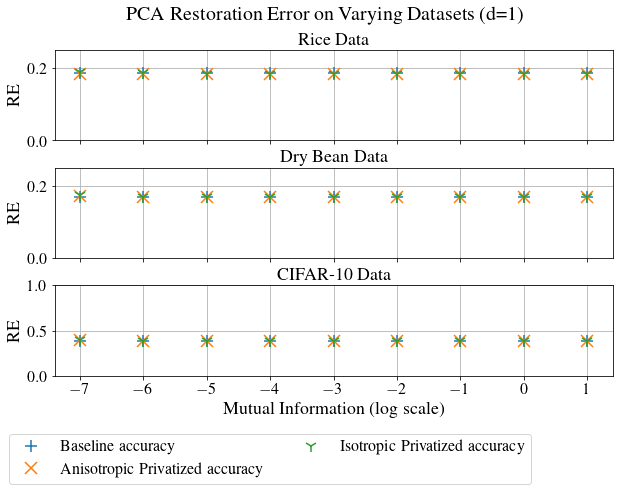

In [46]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
# 

fnames = ["data/rice_pca_dist_mi_{}.pkl",
          "data/bean_pca_dist_mi_{}.pkl",
          "data/cifar10_pca_dist_mi_{}.pkl"]

iso_fnames = ["data/rice_iso_pca_dist_mi_{}.pkl",
            "data/bean_iso_pca_dist_mi_{}.pkl",
          "data/iso_cifar10_pca_dist_mi_{}.pkl"]

data_types = ['Rice', 'Bean', 'CIFAR-10']
titles = ["Rice Data", "Dry Bean Data", "CIFAR-10 Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.1849155953315176, 0.16837339048944142, 0.389900738044782]

dim = 1
ys = [(0, 0.25), (0, 0.25), (0, 1)]
for ind, data in enumerate(data_types):

    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[dim]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[dim]
    ax = axes[ind]
    acc_dict = {}
#     iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [min(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline RE")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized RE")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0, 0.6
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("RE", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("PCA Restoration Error on Varying Datasets (d=1)", fontsize=20)
plt.savefig('hybrid_figs/pca_d=1.png', bbox_inches = "tight")

# print(pickle.load(open(fnames[0].format(true_x_vals[0]), 'rb')))

aniso [0.6769144968908504, 0.24343720474552288, 0.10476905249031386, 0.04966658392899748, 0.024807470806256195, 0.012718812198547393, 0.006631788727770815, 0.00394026120916168, 0.0028194199335052554]
iso [3.450452785861154, 0.9993227625682146, 0.37072729087571454, 0.1696169590690227, 0.08101216738227371, 0.04042948375036759, 0.02007561313888507, 0.010261056248265399, 0.005561117105601859]
aniso [1.7517794462539904, 0.5196493869198391, 0.17944376124555755, 0.07913327323037363, 0.03857988326386121, 0.020273414009243214, 0.012269649650549712, 0.009191497719177304, 0.008242554406612786]
iso [20.128719277896987, 5.0736309146477865, 1.4485141160393449, 0.4943341072867979, 0.20778291115752037, 0.09954154358926116, 0.04966393188913438, 0.02574091915107993, 0.014477153558214323]
aniso [0.7030879124845083, 0.4547335445974101, 0.3695882743075298, 0.34517810138317356, 0.33881542444453283, 0.3372067762370169, 0.33680315851896653, 0.3367022314851498, 0.3366767144954955]
iso [1.304324133226744, 0.707

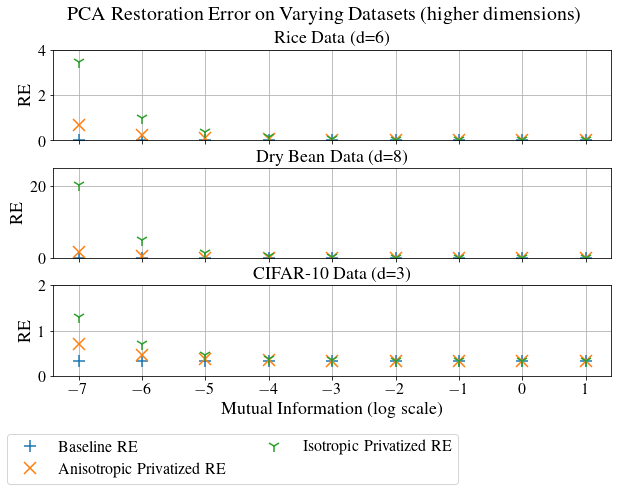

In [47]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0]
# 0.015625, 0.03125, 0.0625, 0.125, 

fnames = ["data/rice_pca_dist_mi_{}.pkl",
          "data/bean_pca_dist_mi_{}.pkl",
          "data/cifar10_pca_dist_mi_{}.pkl"]

iso_fnames = ["data/rice_iso_pca_dist_mi_{}.pkl",
              "data/bean_iso_pca_dist_mi_{}.pkl",
          "data/iso_cifar10_pca_dist_mi_{}.pkl"]

data_types = ['Rice', 'Bean', 'CIFAR-10']
titles = ["Rice Data (d=6)", "Dry Bean Data (d=8)", "CIFAR-10 Data (d=3)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
ys = [(0, 4), (0, 25), (0, 2)]
baseline_vals = [0.0022962300805914066, 0.007807878351306268, 0.33665230833154924]

dims = [6, 8, 3]
for ind, data in enumerate(data_types):

    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[dims[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[dims[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [min(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    print('iso', iso_priv_ys)
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline RE")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized RE")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized RE")

    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("RE", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("PCA Restoration Error on Varying Datasets (higher dimensions)", fontsize=20)
plt.savefig('hybrid_figs/pca_higher_dims.png', bbox_inches = "tight")

# print(pickle.load(open(fnames[0].format(true_x_vals[0]), 'rb')))

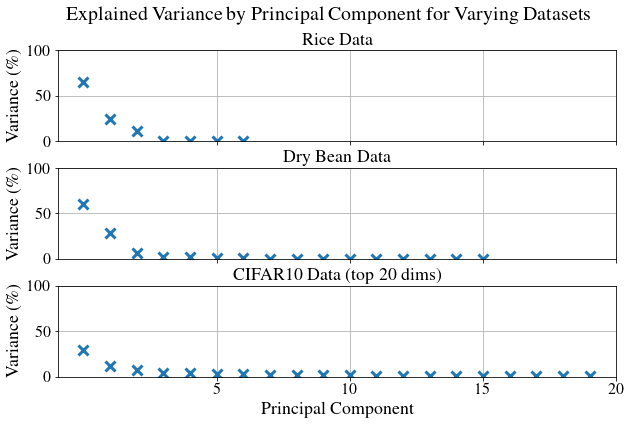

In [48]:
rice_explained_var = [0.6506242290857337, 0.2372633109725393, 0.10945811696346038, 0.0016024579005626536, 0.000758034322984308, 0.00023861549769212874, 5.5235257027472814e-05]
bean_explained_var = [0.6033534165855733, 0.2785851256823293, 0.06122808727678942, 0.024138050359287788, 0.014463903503995752, 0.009719681204229046, 0.006239885715097228, 0.0014478965394851668, 0.0006314652070022946, 9.090695272258236e-05, 7.09415067980201e-05, 1.94233847840926e-05, 1.0441654611948668e-05, 4.7370085481391416e-07, 1.998135295672295e-07, 1.0091290977246153e-07]
cifar10_explained_var = [0.2907662989056515, 0.11253143677034393, 0.06694413963578165, 0.036764588576939025, 0.036088429234138165, 0.028092298273312506, 0.027129920468951633, 0.021671624962741214, 0.020646414039878113, 0.014380014944903246, 0.013105627525556267, 0.010659784252032716, 0.010499812362189248, 0.010042685183294563, 0.00918482261730212, 0.008174001500280186, 0.007396079040473611, 0.007161298663178033, 0.006874716141505839, 0.006432434693362856]
rice_var_pct = [100.*k for k in rice_explained_var]
bean_var_pct = [100.*k for k in bean_explained_var]
cifar10_var_pct = [100.*k for k in cifar10_explained_var]


data_types = ['rice', 'bean', 'cifar10']
titles = ["Rice Data", "Dry Bean Data", "CIFAR10 Data (top 20 dims)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))

y_vals = [rice_var_pct, bean_var_pct, cifar10_var_pct]
for ind, data in enumerate(data_types):
    ax = axes[ind]
    acc_dict = {}

    ax.plot(range(len(y_vals[ind])), y_vals[ind], 'x', markersize=10, mew=3.)
    y_min, y_max = 0, 100
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Variance (\%)", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.set_xticks([5, 10, 15, 20]) 
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()
# lgd = fig.legend(handles, labels, ncol=1, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.1))
plt.xlabel("Principal Component", fontsize=18)

plt.suptitle("Explained Variance by Principal Component for Varying Datasets", fontsize=20)
plt.savefig('hybrid_figs/pca_explained_var.png', bbox_inches = "tight")

nonprivate [0.8357790840068532, 0.8357790840068532, 0.8357790840068532, 0.8357790840068532, 0.8357790840068532, 0.8357790840068532, 0.8357790840068532, 0.8357790840068532, 0.8357790840068532, 0.8357790840068532]
aniso [0.21407102620622162, 0.24279377908400712, 0.29492481018858707, 0.4044812637766348, 0.5532987999020326, 0.681313739897136, 0.7661266225814356, 0.8078846436443777, 0.825044330149396, 0.8216336027430767]
nonprivate [0.6933110457996565, 0.6933110457996565, 0.6933110457996565, 0.6933110457996565, 0.6933110457996565, 0.6933110457996565, 0.6933110457996565, 0.6933110457996565, 0.6933110457996565, 0.6933110457996565]
aniso [0.5284523634582413, 0.5340156747489597, 0.5617379377908387, 0.591155277981874, 0.6115055106539296, 0.6126617683076166, 0.653554004408521, 0.6535642909625256, 0.6256676463384754, 0.6609534655890253]


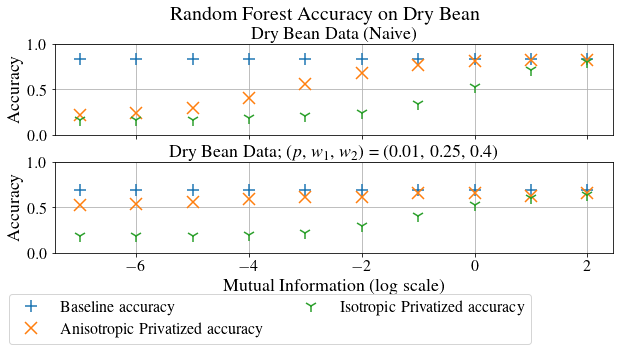

In [8]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
regs = [(None, 0.0, 1.0), (0.01, 0.4, 0.75)]
fnames = ["data/bean_acc_auto_reg={}_mi={}.pkl",
          "data/bean_acc_auto_reg={}_mi={}.pkl"]
# iris_iso_acc_auto_reg=(0.01, 0.1, 0.95)_mi=0.015625.pkl	
iso_fnames = ["data/bean_iso_acc_auto_reg={}_mi={}.pkl",
          "data/bean_iso_acc_auto_reg={}_mi={}.pkl"]

data_types = ['bean', 'bean']
titles = ["Dry Bean Data (Naive)", "Dry Bean Data; ($p$, $w_1$, $w_2$) = (0.01, 0.25, 0.4)"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 4))

baseline_vals = [0.8357790840068532, 0.6933110457996565]

# max precision, reg_param, weight_orig in code; max_precision, weiight_orig, reg_param in text

for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(regs[ind], mi), 'rb'))[regs[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('nonprivate', subsampling_ys)
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    y_min, y_max = 0., 1.0
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Random Forest Accuracy on Dry Bean", fontsize=20)
plt.savefig('hybrid_figs/dry_bean_dt.svg', bbox_inches='tight')
# plt.savefig('hybrid_figs/dt_naive.png', bbox_inches = "tight")
# hybrid_dt/iris_acc_auto_reg=(None, 0.0, 1.0)_mi=0.015625.pkl

In [ ]:
# max precision, reg_param, weight_orig in code; max_precision, weiight_orig, reg_param in text
